## Predict if a loan get approved or not

In [299]:
#import all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [300]:
#load csv file using pandas and observe the data
df = pd.read_csv('loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [301]:
#finding the total missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [302]:
#finding the shape of dataframe
df.shape

(614, 13)

In [303]:
#method to count values (urban, rural, semiurban) in column(property_area)
countu=0
countr=0
countsu=0
for i in df['Property_Area']:
    if i == 'Urban':
        countu+=1
    if i == 'Rural':
        countr+=1
    if i == 'Semiurban':
        countsu+=1
print("Total count of Ubran {}, Rural {}, Semiurban {} is".format(countu,countr,countsu))

Total count of Ubran 202, Rural 179, Semiurban 233 is


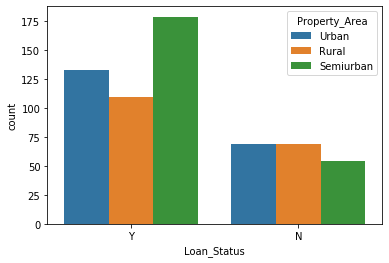

In [304]:
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)
#data fount not much iformative so lets check another col

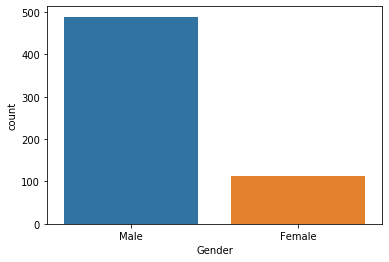

In [305]:
sns.countplot(x='Gender', data=df)

In [306]:
#its found that most of person are male
#so we can put nan value(missing values) as male
df['Gender'].replace(np.nan, "Male", inplace=True)

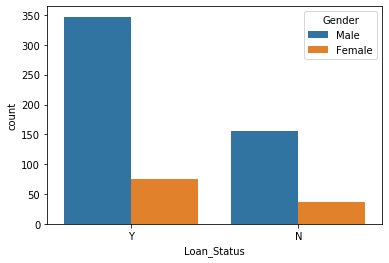

In [307]:
sns.countplot(x='Loan_Status', hue='Gender',data=df)
#data fount not much iformative so lets check another col

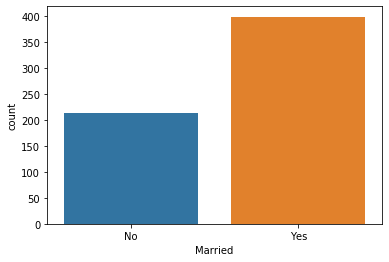

In [308]:
sns.countplot(x='Married', data=df)

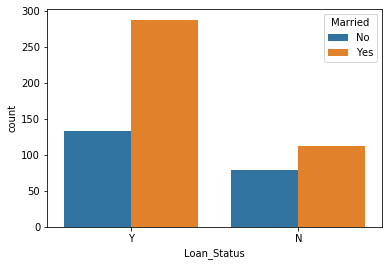

In [309]:
#its found most of people are married
df['Married'].replace(np.nan, "Yes", inplace=True)
sns.countplot(x='Loan_Status' ,hue='Married', data=df)
#its found that most married people paid the loan

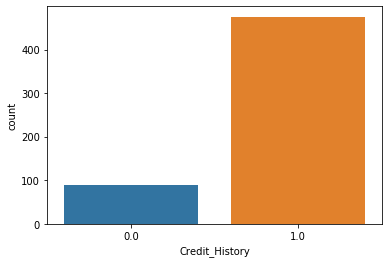

In [310]:
sns.countplot(x='Credit_History', data=df)

In [311]:
df['Credit_History'].replace(np.nan,1.0, inplace=True)

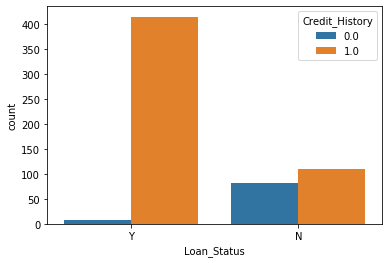

In [312]:
sns.countplot(x='Loan_Status', hue='Credit_History', data=df)
#its found that credit history is major feature of loan status

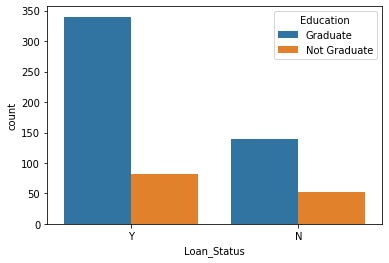

In [313]:
sns.countplot(x='Loan_Status', hue='Education', data=df)
#found Education is also major feature

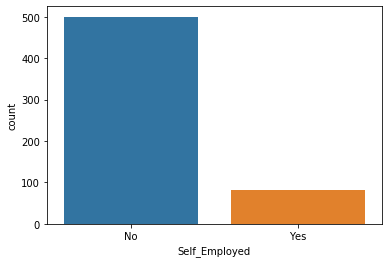

In [314]:
sns.countplot(x='Self_Employed', data=df)

In [315]:
#since majority is not self employed we can fill nan by no
df['Self_Employed'].replace(np.nan, "No", inplace=True)

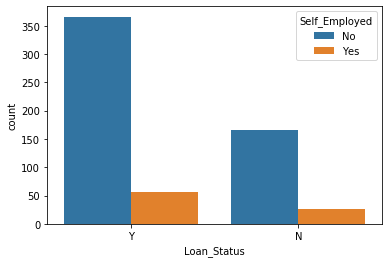

In [316]:
sns.countplot(x='Loan_Status', hue='Self_Employed', data=df)
#not being self employed is not important feature but a bit relatable

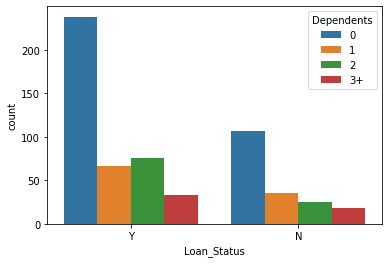

In [317]:
sns.countplot(x='Loan_Status', hue='Dependents', data=df)
#found 0 dependents mostly pay their loans

In [318]:
#its clear from above plot that most dependents is 0 so 
df['Dependents'].replace(np.nan,'0', inplace=True)

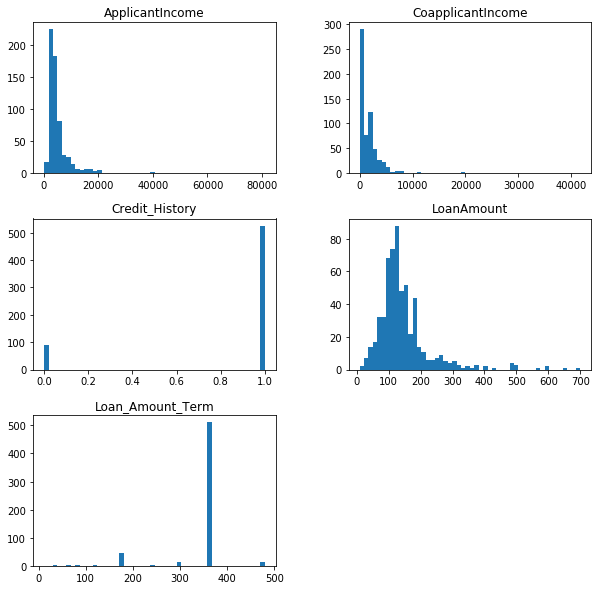

In [319]:
df.hist(bins=50, figsize=(10,10), grid=False)
plt.show()

In [320]:
#360 is mean value of Loan_Amount_Term
df['Loan_Amount_Term'].replace(np.nan, 360.0, inplace=True)

In [321]:
df['LoanAmount'].replace(np.nan, df['LoanAmount'].mean(), inplace=True)

In [322]:
df.isnull().sum()
#now no n=missing data remaining

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

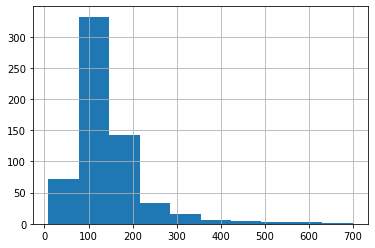

In [323]:
df['LoanAmount'].hist()

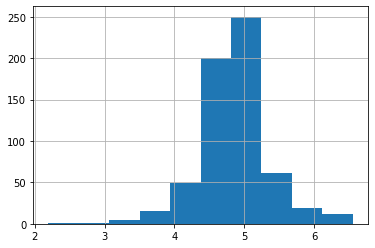

In [324]:
#positive outliers is found
#fixing the outliers via log function
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist()

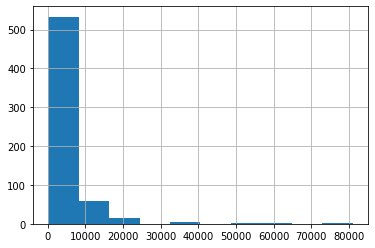

In [325]:
df['ApplicantIncome'].hist()

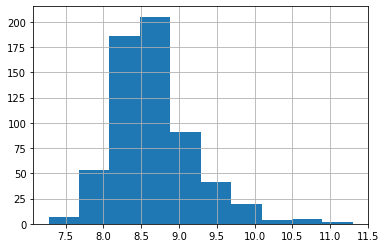

In [326]:
#similarly, again fixing the outliers
df['TotalIncome_log'] = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])
df['TotalIncome_log'].hist()

In [327]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515


In [328]:
df = df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"],axis=1)

In [329]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.986426,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.948760,8.699515


In [330]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
LoanAmount_log      float64
TotalIncome_log     float64
dtype: object

In [331]:
#converting yes no to 0 1
from sklearn.preprocessing import LabelEncoder
categorical_column = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in categorical_column:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1,0,0,0,0,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,360.0,1.0,2,1,4.948760,8.699515


In [332]:
df.dtypes
#now all data types are int or float ready for processing

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
LoanAmount_log      float64
TotalIncome_log     float64
dtype: object

In [333]:
x_data = df.drop(['Loan_Status'], axis=1)
y_data = df['Loan_Status']
x_data.shape

(614, 10)

In [334]:
#train-test-split to separate data for training and testing with test size of 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [335]:
test_y_hat = lm.predict(x_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))

Mean absolute error: 0.31
Residual sum of squares (MSE): 0.16


In [336]:
from sklearn.metrics import accuracy_score
print("Accuracy score is : ",accuracy_score(y_test, test_y_hat.round()))

Accuracy score is :  0.8048780487804879


In [337]:
#creating the confusion matrix to chcek total true or correctly predicted value
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_y_hat.round())
cnf_matrix
#13 and 61 values are correctly predicted

array([[16, 23],
       [ 1, 83]], dtype=int64)

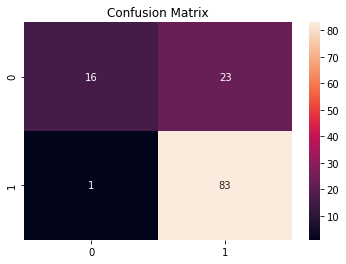

In [338]:
#plotting confusin matrix via heat map
sns.heatmap(cnf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()

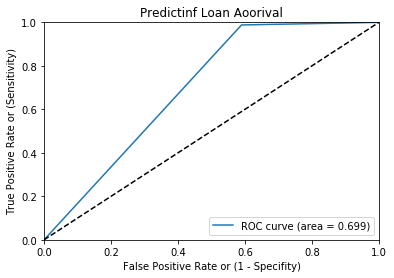

In [339]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, test_y_hat.round())
roc_auc = roc_auc_score(y_test, test_y_hat.round())

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Predictinf Loan Aoorival')
plt.legend(loc="lower right")
